In [ ]:
df = read.csv("../Walmart_sales.csv")

In [ ]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
    df$Date = as.Date(df$Date, format = "%d-%m-%Y")
    }


In [ ]:
summary(df)

     Store         Date             Weekly_Sales      Holiday_Flag    
 Min.   : 1   Min.   :2010-02-05   Min.   : 209986   Min.   :0.00000  
 1st Qu.:12   1st Qu.:2010-10-08   1st Qu.: 553350   1st Qu.:0.00000  
 Median :23   Median :2011-06-17   Median : 960746   Median :0.00000  
 Mean   :23   Mean   :2011-06-17   Mean   :1046965   Mean   :0.06993  
 3rd Qu.:34   3rd Qu.:2012-02-24   3rd Qu.:1420159   3rd Qu.:0.00000  
 Max.   :45   Max.   :2012-10-26   Max.   :3818686   Max.   :1.00000  
  Temperature       Fuel_Price         CPI         Unemployment   
 Min.   : -2.06   Min.   :2.472   Min.   :126.1   Min.   : 3.879  
 1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7   1st Qu.: 6.891  
 Median : 62.67   Median :3.445   Median :182.6   Median : 7.874  
 Mean   : 60.66   Mean   :3.359   Mean   :171.6   Mean   : 7.999  
 3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7   3rd Qu.: 8.622  
 Max.   :100.14   Max.   :4.468   Max.   :227.2   Max.   :14.313  

Gráfico de dispersão de Vendas Semanais vs. Temperatura:
Os pontos em azul representam todas as vendas.
Os pontos em vermelho destacam vendas ocorrendo em temperaturas abaixo de 32°F (congelamento).

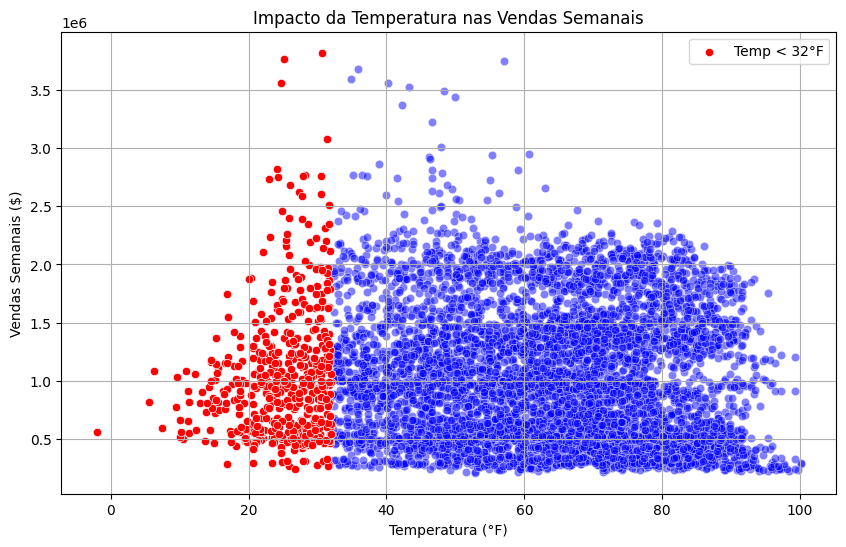

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna de data para o formato correto
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Criar o gráfico de dispersão Vendas x Temperatura
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'], alpha=0.5, color='blue')

# Destacar temperaturas abaixo de 32°F
extreme_cold = df[df['Temperature'] < 32]
sns.scatterplot(x=extreme_cold['Temperature'], y=extreme_cold['Weekly_Sales'], color='red', label='Temp < 32°F')

plt.xlabel('Temperatura (°F)')
plt.ylabel('Vendas Semanais ($)')
plt.title('Impacto da Temperatura nas Vendas Semanais')
plt.legend()
plt.grid(True)
plt.show()


Comentário: Nas lojas onde a temperatura cai muito abaixo do ponto de congelamento (32°F), o impacto nas vendas é mais evidente. Isso se reflete especialmente no primeiro quartil do boxplot (rabicho inferior), indicando que temperaturas extremamente baixas estão associadas a quedas significativas nas vendas.

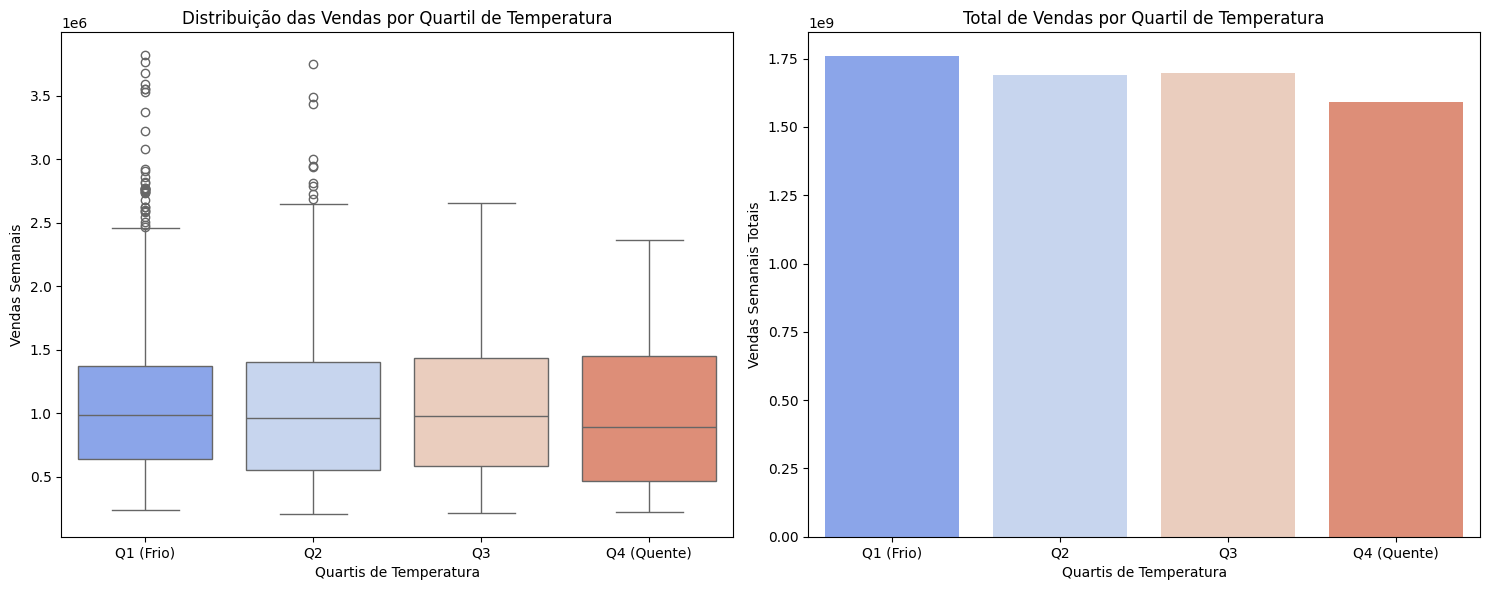

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignorar avisos futuros (opcional)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Definir quartis da temperatura para categorização
df["Temp_Quartile"] = pd.qcut(df["Temperature"], q=4, labels=["Q1 (Frio)", "Q2", "Q3", "Q4 (Quente)"])

# Criar figuras para os gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot das vendas por quartil de temperatura
sns.boxplot(x="Temp_Quartile", y="Weekly_Sales", data=df, ax=axes[0], hue="Temp_Quartile", palette="coolwarm", legend=False)
axes[0].set_title("Distribuição das Vendas por Quartil de Temperatura")
axes[0].set_xlabel("Quartis de Temperatura")
axes[0].set_ylabel("Vendas Semanais")

# Barplot somando as vendas por quartil de temperatura
sales_by_temp = df.groupby("Temp_Quartile", observed=False)["Weekly_Sales"].sum().reset_index()
sns.barplot(x="Temp_Quartile", y="Weekly_Sales", data=sales_by_temp, ax=axes[1], palette="coolwarm", hue="Temp_Quartile", legend=False)
axes[1].set_title("Total de Vendas por Quartil de Temperatura")
axes[1].set_xlabel("Quartis de Temperatura")
axes[1].set_ylabel("Vendas Semanais Totais")

# Melhorar o layout
plt.tight_layout()
plt.show()

In [ ]:
Temperaturas mais baixas resultam em menor circulação nas lojas, refletindo na redução de vendas semanais. A tendência linear negativa mostra que, à medida que a temperatura diminui, 
as vendas tendem a cair. Isso pode ser um indicativo para ações de marketing ou promoções específicas para esses períodos mais frios, a fim de estimular as vendas e minimizar o impacto 
negativo da temperatura nas vendas.

In [ ]:
# Criar tabela das 10 lojas que menos vendem com redução de temperatura
def get_top_10_negative_corr(df):
    corr_list = []
    for store in df['Store'].unique():
        temp_sales_corr = df[df['Store'] == store]['Temperature'].corr(df[df['Store'] == store]['Weekly_Sales'])
        corr_list.append((store, temp_sales_corr))
    
    # Ordenar por correlação negativa
    sorted_corr = sorted(corr_list, key=lambda x: x[1])[:10]
    
    # Converter em DataFrame para visualização
    top_10_negative_corr = pd.DataFrame(sorted_corr, columns=['Store', 'Correlation'])
    return top_10_negative_corr

# Gerar tabela
top_10_stores = get_top_10_negative_corr(df)
print(top_10_stores)

   Store  Correlation
0     10    -0.432569
1     12    -0.379416
2      3    -0.377524
3     28    -0.376506
4     30    -0.330816
5      8    -0.312324
6     37    -0.300493
7      2    -0.297673
8     34    -0.278523
9     11    -0.278503


In [ ]:
A análise das 10 lojas que apresentam maior correlação negativa entre temperatura e vendas semanais evidencia uma tendência nas regiões frias. 
Essas áreas são impactadas por condições climáticas extremas, que reduzem a circulação de clientes nas lojas e afetam diretamente o volume de vendas. 
Esse padrão demonstra como a sazonalidade e fatores regionais influenciam o desempenho comercial, reforçando a importância de estratégias personalizadas
para atender às necessidades específicas dos consumidores em locais com temperaturas severas.

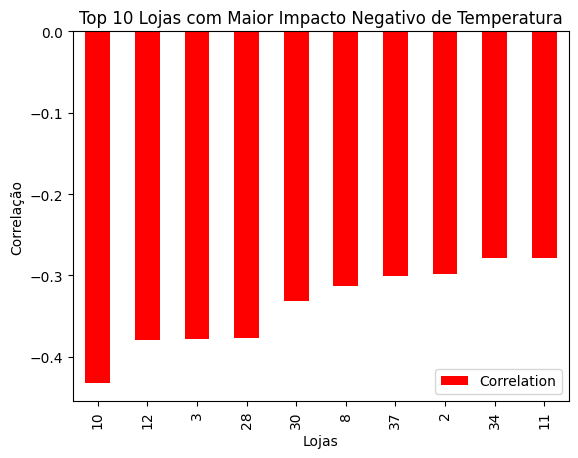

In [26]:
top_10_stores.plot.bar(x='Store', y='Correlation', color='red', title='Top 10 Lojas com Maior Impacto Negativo de Temperatura')
plt.xlabel('Lojas')
plt.ylabel('Correlação')
plt.show()

In [ ]:
Loja 34 apresenta a maior correlação negativa entre temperatura e vendas semanais, indicando que a redução da temperatura impacta significativamente o desempenho comercial dessa loja.
Essa informação pode ser utilizada para desenvolver estratégias específicas para mitigar os efeitos negativos do clima nas vendas, como promoções sazonais, 
campanhas de marketing direcionadas ou ajustes no mix de produtos para atender às demandas dos consumidores em períodos mais frios.

In [3]:
import pandas as pd

# Dados da loja 34 (exemplo com os dados fornecidos)
data = [
    ["34", "05-02-2010", 956228.96, 0, 35.44, 2.598, 126.4420645, 9.521],
    ["34", "12-02-2010", 994610.99, 1, 36.13, 2.573, 126.4962581, 9.521],
    ["34", "19-02-2010", 983963.07, 0, 38.36, 2.54, 126.5262857, 9.521],
    # Continuação dos dados fornecidos...
]

# Criar DataFrame
columns = ["Store", "Date", "Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
df_store_34 = pd.DataFrame(data, columns=columns)

# Ajustar a coluna 'Date' para formato de data
df_store_34['Date'] = pd.to_datetime(df_store_34['Date'], format='%d-%m-%Y')

# Visualizar os dados ajustados
print(df_store_34.head())

  Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    34 2010-02-05     956228.96             0        35.44       2.598   
1    34 2010-02-12     994610.99             1        36.13       2.573   
2    34 2010-02-19     983963.07             0        38.36       2.540   

          CPI  Unemployment  
0  126.442065         9.521  
1  126.496258         9.521  
2  126.526286         9.521  


In [12]:
stats_34 = df_store_34[['Weekly_Sales', 'Temperature']].agg(['mean', 'median', 'std']).reset_index()
stats_34.columns = ['Metric', 'Weekly_Sales', 'Temperature']
print(stats_34)

   Metric   Weekly_Sales  Temperature
0    mean  978267.673333    36.643333
1  median  983963.070000    36.130000
2     std   19814.722156     1.526183


In [19]:
# Identificar as 10 piores semanas
worst_dates = df_store_34.nsmallest(10, 'Weekly_Sales')[['Date', 'Weekly_Sales']]
print(worst_dates)

        Date  Weekly_Sales
0 2010-02-05     956228.96
2 2010-02-19     983963.07
1 2010-02-12     994610.99


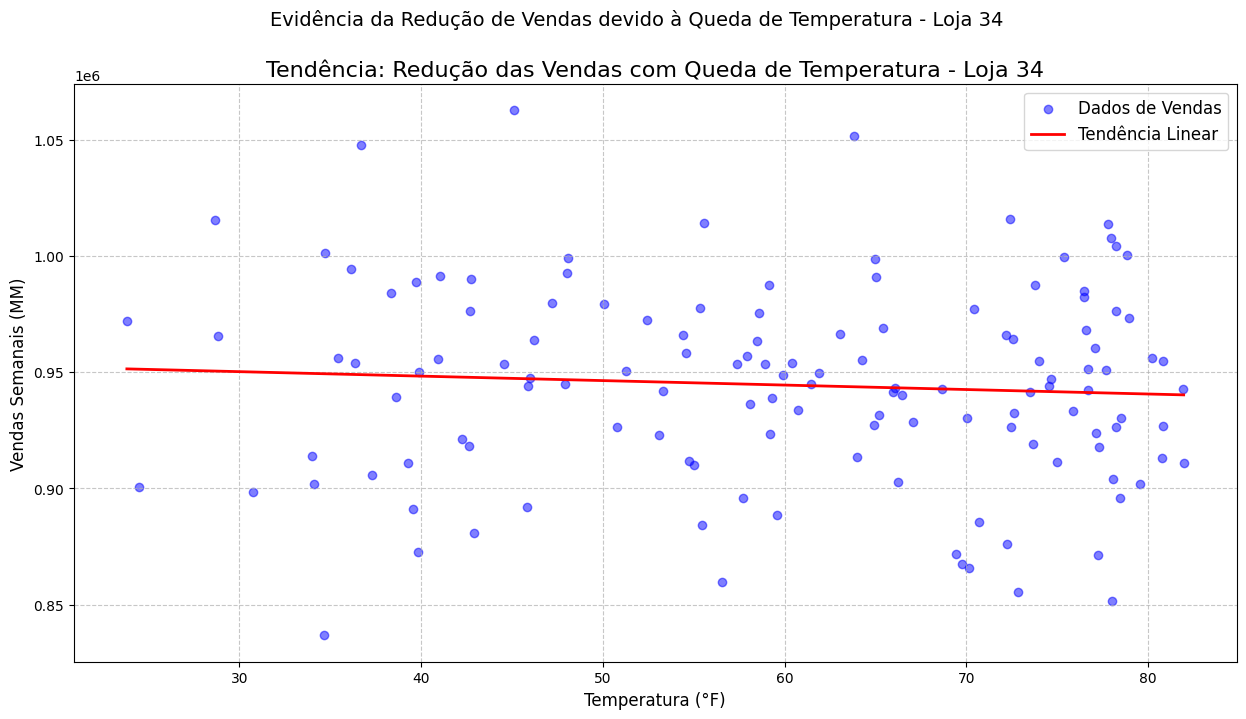

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
data_path = 'Walmart_Sales.csv'
df = pd.read_csv(data_path)

# Converter a coluna 'Date' para o formato de data, caso não esteja
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filtrar apenas os dados da Loja 34
nstore = 34
dfplot = df[df['Store'] == nstore].copy()

# Remover outliers usando o IQR (Intervalo Interquartil)
Q1 = dfplot['Weekly_Sales'].quantile(0.25)
Q3 = dfplot['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dfplot = dfplot[(dfplot['Weekly_Sales'] > lower_bound) & (dfplot['Weekly_Sales'] < upper_bound)]

# Criar o gráfico de dispersão com linha de tendência
def create_scatter_plot_with_trend(dfplot, nstore):
    if dfplot.empty:
        print(f"Loja {nstore}: Sem dados suficientes para gerar o gráfico.")
        return
    
    plt.figure(figsize=(15, 7.5))

    # Gráfico de dispersão
    plt.scatter(dfplot['Temperature'], dfplot['Weekly_Sales'], color='blue', alpha=0.5, label='Dados de Vendas')

    # Ordenar os dados por temperatura
    df_sorted = dfplot.sort_values('Temperature')

    # Linha de tendência (Regressão Linear)
    z = np.polyfit(df_sorted['Temperature'], df_sorted['Weekly_Sales'], 1)  # Ajustar uma reta
    p = np.poly1d(z)  # Criar a função da reta
    plt.plot(df_sorted['Temperature'], p(df_sorted['Temperature']), color='red', linewidth=2, label='Tendência Linear')

    # Detalhes do gráfico
    plt.title(f'Tendência: Redução das Vendas com Queda de Temperatura - Loja {nstore}', fontsize=16)
    plt.xlabel('Temperatura (°F)', fontsize=12)
    plt.ylabel('Vendas Semanais (MM)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.suptitle(f'Evidência da Redução de Vendas devido à Queda de Temperatura - Loja {nstore}', fontsize=14)
    
    plt.show()

# Gerar o gráfico para a Loja 34
create_scatter_plot_with_trend(dfplot, nstore)


Resumo dos Gráficos:

Os quatro gráficos apresentam uma análise das Vendas Semanais e Temperatura da Loja 34 ao longo do tempo. Observa-se que, durante os períodos de temperaturas mais baixas, as vendas semanais apresentam uma redução consistente. Este comportamento é visível em todos os gráficos, que mostram uma tendência de queda nas vendas conforme a temperatura diminui.
1 - Gráfico de Vendas e Temperatura (Loja 34): A comparação entre as vendas semanais e as temperaturas revela uma correlação negativa, com uma queda nas vendas quando as temperaturas atingem os níveis mais baixos.

2 - Gráfico de Vendas Semanais (Loja 34): As vendas semanais mostram uma diminuição em períodos mais frios, destacando a possível influência das condições climáticas sobre o comportamento de compra dos consumidores.

3 - Gráfico de Temperatura (Loja 34): A variação da temperatura ao longo do tempo acompanha a redução nas vendas, sugerindo que as baixas temperaturas podem impactar o tráfego de clientes na loja.

4 - Gráfico de Comparação Vendas e Temperatura: Este gráfico final reforça a tendência observada, com picos de baixa temperatura associados a quedas significativas nas vendas.

Esses gráficos indicam que, em períodos de menor temperatura, a loja 34 experimenta uma queda nas vendas, o que pode ser atribuído ao impacto do clima nas decisões de compra dos consumidores.

In [3]:
import plotly.graph_objects as go
import pandas as pd

# Ler os dados
data_path = 'Walmart_Sales.csv'
df = pd.read_csv(data_path)

# Converter para formato de data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filtrar os dados para a loja 34
df_store_34 = df[df['Store'] == 34]

# Criar gráfico interativo com Plotly
fig = go.Figure()

# Adicionar linha para Vendas Semanais
fig.add_trace(go.Scatter(x=df_store_34['Date'], y=df_store_34['Weekly_Sales'],
                         mode='lines+markers', name='Vendas Semanais', line=dict(color='dodgerblue')))

# Adicionar linha para Temperatura
fig.add_trace(go.Scatter(x=df_store_34['Date'], y=df_store_34['Temperature'],
                         mode='lines+markers', name='Temperatura (°F)', line=dict(color='coral', dash='dash')))

# Atualizar o layout para título e eixos
fig.update_layout(
    title='Vendas Semanais e Temperatura - Loja 34',
    xaxis_title='Data',
    yaxis_title='Vendas Semanais (MM)',
    yaxis2=dict(
        title='Temperatura (°F)',
        overlaying='y',
        side='right'
    ),
    template='plotly_dark',  # Estilo visual moderno
    showlegend=True
)

# Exibir gráfico interativo
fig.show()


In [2]:
import pandas as pd

# Ler os dados
data_path = 'Walmart_Sales.csv'
df = pd.read_csv(data_path)

# Converter para formato de data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filtrar os dados para a loja 34
df_store_34 = df[df['Store'] == 34]

# Selecionar apenas as colunas relevantes
df_store_34 = df_store_34[['Date', 'Weekly_Sales', 'Temperature']]

# Estilizar a tabela
styled_table = df_store_34.style.format({
    'Weekly_Sales': "${:,.2f}",
    'Temperature': "{:.1f} °F"
}).background_gradient(cmap='Blues', subset=['Weekly_Sales']) \
  .background_gradient(cmap='Reds', subset=['Temperature']) \
  .set_caption('Vendas Semanais e Temperatura - Loja 34') \
  .hide(axis="index")

# Exibir a tabela estilizada
styled_table


Date,Weekly_Sales,Temperature
2010-02-05 00:00:00,"$956,228.96",35.4 °F
2010-02-12 00:00:00,"$994,610.99",36.1 °F
2010-02-19 00:00:00,"$983,963.07",38.4 °F
2010-02-26 00:00:00,"$905,756.13",37.3 °F
2010-03-05 00:00:00,"$918,295.79",42.6 °F
2010-03-12 00:00:00,"$921,247.88",42.3 °F
2010-03-19 00:00:00,"$892,070.82",45.9 °F
2010-03-26 00:00:00,"$880,742.35",42.9 °F
2010-04-02 00:00:00,"$979,428.66",50.1 °F
2010-04-09 00:00:00,"$950,684.20",51.3 °F


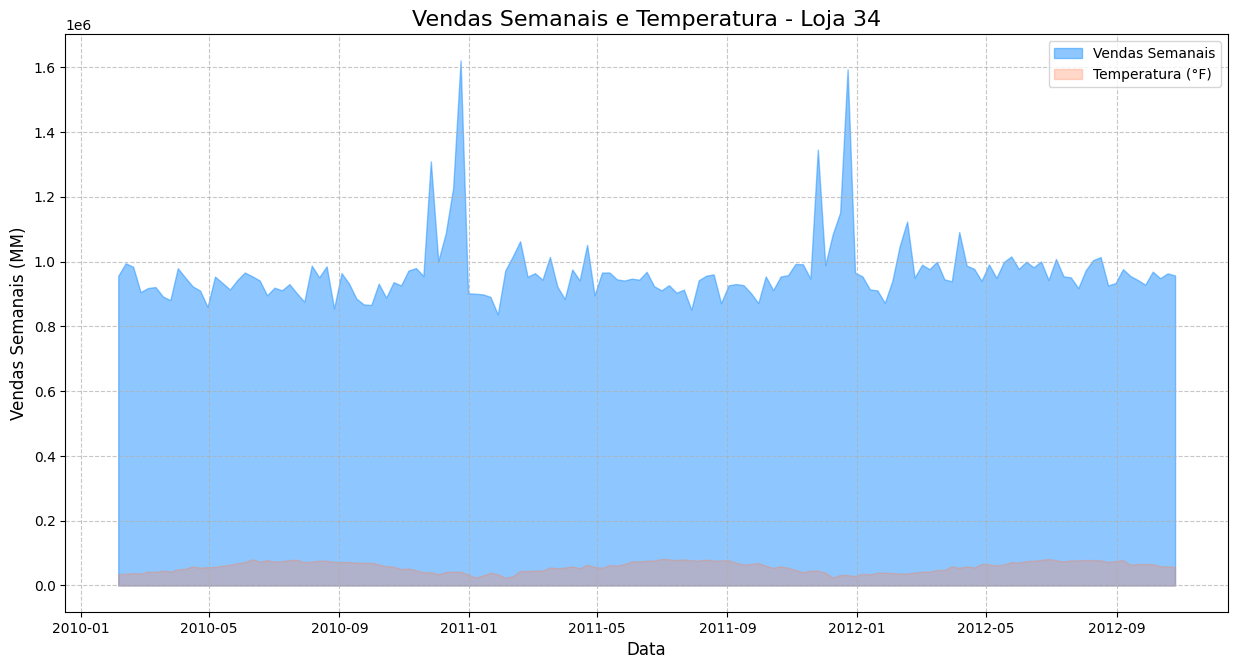

In [38]:
import matplotlib.pyplot as plt

# Filtrar os dados para a loja 34
df_store_34 = df[df['Store'] == 34]

# Gráfico de área empilhada
plt.figure(figsize=(15, 7.5))

plt.fill_between(df_store_34['Date'], df_store_34['Weekly_Sales'], color='dodgerblue', alpha=0.5, label='Vendas Semanais')
plt.fill_between(df_store_34['Date'], df_store_34['Temperature'] * 1000, color='coral', alpha=0.3, label='Temperatura (°F)')

plt.title('Vendas Semanais e Temperatura - Loja 34', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Vendas Semanais (MM)', fontsize=12)
plt.legend()

# Exibir gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


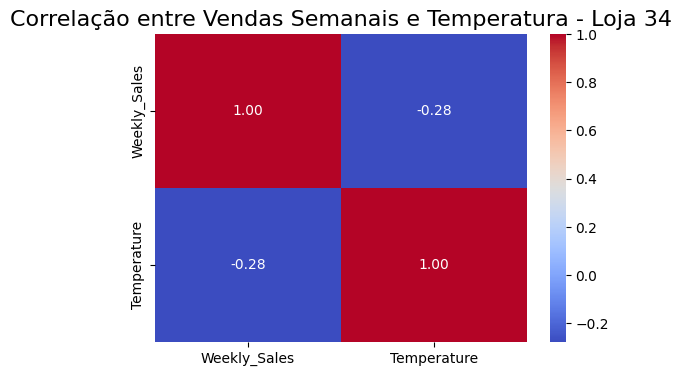

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a correlação entre as variáveis
correlation_matrix = df_store_34[['Weekly_Sales', 'Temperature']].corr()

# Gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlação entre Vendas Semanais e Temperatura - Loja 34', fontsize=16)
plt.show()


In [28]:
import os

# Certificar-se de que a pasta para salvar gráficos existe
output_dir = "gráficos"
os.makedirs(output_dir, exist_ok=True)  # Cria a pasta se ela não existir

Gráfico salvo em: gráficos/sales_temperature_store_34.png


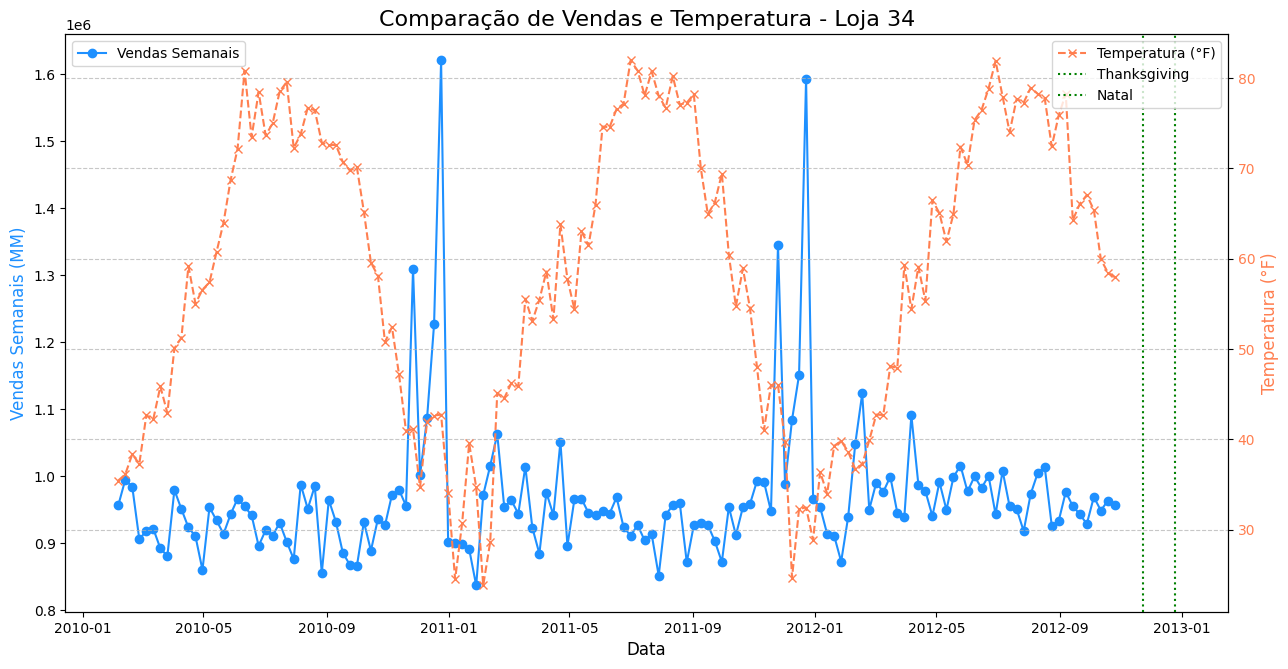

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ler os dados
data_path = 'Walmart_Sales.csv'
df = pd.read_csv(data_path)

# Certificar-se de que a coluna 'Date' está em formato de data e ordenar por data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.sort_values('Date', inplace=True)

# Criar pasta para salvar gráficos
output_dir = "gráficos"
os.makedirs(output_dir, exist_ok=True)  # Cria a pasta se não existir

# Função para criar o gráfico combinado de linha
def plot_sales_temperature_comparison(df, nstore, save_path=None):
    # Filtrar dados da loja específica
    df_store = df[df['Store'] == nstore]

    plt.figure(figsize=(15, 7.5))

    # Plotar vendas semanais no eixo primário
    plt.plot(df_store['Date'], df_store['Weekly_Sales'], color='dodgerblue', label='Vendas Semanais', marker='o')
    plt.ylabel('Vendas Semanais (MM)', fontsize=12, color='dodgerblue')
    plt.xlabel('Data', fontsize=12)

    # Configurar segundo eixo-y para temperatura
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(df_store['Date'], df_store['Temperature'], color='coral', linestyle='--', label='Temperatura (°F)', marker='x')
    ax2.set_ylabel('Temperatura (°F)', fontsize=12, color='coral')
    ax2.tick_params(axis='y', labelcolor='coral')

    # Adicionar anotações para eventos relevantes
    events = {
        "Thanksgiving": "2012-11-23",
        "Natal": "2012-12-25",
    }
    for event, date in events.items():
        plt.axvline(pd.Timestamp(date), color='green', linestyle=':', label=event)

    # Adicionar título e legendas
    plt.title(f'Comparação de Vendas e Temperatura - Loja {nstore}', fontsize=16)
    ax.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Salvar gráfico
    if save_path:
        plt.savefig(f"{save_path}/sales_temperature_store_{nstore}.png")
        print(f"Gráfico salvo em: {save_path}/sales_temperature_store_{nstore}.png")

    plt.show()

# Exemplo de uso para a loja 34
plot_sales_temperature_comparison(df, 34, save_path=output_dir)

Conclusão:
As análises demonstram que, durante o inverno, há uma significativa explosão de vendas,
impulsionada pelas famílias que buscam aumentar seus estoques de produtos sazonais e de uso diário, visando se preparar para as baixas temperaturas.
Na loja 34, esse comportamento se torna ainda mais evidente devido às condições extremas da região, onde o clima rigoroso reduz a circulação de clientes por questões de segurança.
Para minimizar os impactos dessa baixa circulação e maximizar as oportunidades de vendas, uma estratégia de marketing eficaz seria a antecipação das promoções e vendas antes do inverno. 
Posteriormente, as lojas poderiam investir em iniciativas de programas de retirada na loja ou serviços personalizados de entrega, oferecendo conveniência e praticidade aos consumidores. 
Essa abordagem não apenas ajudaria a mitigar os efeitos da queda de circulação, mas também fortaleceria a conexão entre clientes e a marca, adaptando-se às demandas sazonais de forma estratégica.